In [ ]:

from google.colab import drive
import os
import os.path as path
import os as os
from os import listdir
from os.path import isfile, join, isdir
from sklearn.manifold import TSNE
# from keras.datasets import mnist
from sklearn.datasets import load_iris
import numpy as np
from numpy import reshape
import seaborn as sns
import pandas as pd
from PIL import Image
from scipy.special import softmax
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.cm as cm
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer



Mounted at /content/gdrive


In [ ]:
def taken_data(train_path = "3dshapes_train", test_path = "3dshapes_test"):
    train_images = np.array([np.asarray(Image.open(f"{train_path}/{i}.jpg")) for i in range(10000)])
    train_labels = np.load("gdrive/My Drive/Cmpe462 files/orientations_train.npy")[:10000]
    test_images = np.array([np.asarray(Image.open(f"{test_path}/{i}.jpg")) for i in range(1000)])
    test_labels = np.load("gdrive/My Drive/Cmpe462 files/orientations_test.npy")[:1000]

    gray_train_images = np.zeros((train_images.shape[0], train_images.shape[1], train_images.shape[2]))
    gray_test_images = np.zeros((test_images.shape[0], test_images.shape[1], test_images.shape[2]))

    gray_train_images[:, :, :] = train_images[:, :, :, 0] * 0.2989 + train_images[:, :, :, 1] * 0.5870 + train_images[:, :, :, 2] * 0.1140
    gray_test_images[:, :, :] = test_images[:, :, :, 0] * 0.2989 + test_images[:, :, :, 1] * 0.5870 + test_images[:, :, :, 2] * 0.1140

    flatten_train_images = gray_train_images.reshape(gray_train_images.shape[0], gray_train_images.shape[1]*gray_train_images.shape[2])
    flatten_test_images = gray_test_images.reshape(gray_test_images.shape[0], gray_test_images.shape[1]*gray_test_images.shape[2])

    print("Size of the training matrix: ", flatten_train_images.shape)

    return flatten_train_images, train_labels, flatten_test_images, test_labels

In [ ]:
root_path = 'gdrive/My Drive/Cmpe462 files'
train_folder, test_folder = join(root_path, "3dshapes_train") , join(root_path, "3dshapes_test")
train_data, train_label, test_data, test_label = taken_data(train_path = train_folder, test_path = test_folder) #We used take data function from Phase1

Size of the training matrix:  (1000, 4096)


In [ ]:
print(len(set(train_label)), len(train_data[0]))




15 4096


In [ ]:

pca = PCA(n_components=300)

train = pca.fit_transform(train_data)
scaler = preprocessing.StandardScaler().fit(train)
test = pca.transform(test_data)
scaler = preprocessing.StandardScaler().fit(test)

t_2d = TSNE(n_components=2)
t_2d_f = t_2d.fit_transform(train)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


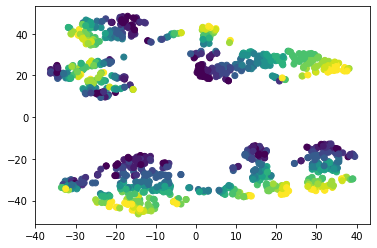

In [ ]:

plt.scatter(t_2d_f[:, 0], t_2d_f[:, 1], c=train_label)

In [ ]:
t_3d = TSNE(n_components=3)
t_3d_f = t_2d.fit_transform(train)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
onehot_encoder = OneHotEncoder(sparse=False)   # used for getting one hot encoding labels for train and test sets
train_onehot = onehot_encoder.fit_transform(train_label.reshape(-1,1)) # one_hot encoding of train labels
samplesize, featuresize = train_data.shape
w = np.zeros((train_data.shape[1],train_onehot.shape[1]))  # weight initialization
iterations, learning_rate = 2000 , 0.001
label_sigmoid = softmax(train_label)
for i in range (iterations):
    model = np.dot(train_data,w)  # model created
    predictions = softmax(model,axis=1) # predictions are made
    dw = np.dot(train_data.T, (predictions-train_onehot)) #gradient of weight
    w -= learning_rate * dw # update weight
training_accuracy = sum([int(np.array_equal(predictions[i], train_onehot[i])) for i in range(train_data.shape[0]) ])  #number of correctly predicted samples in training set
print("Training accuracy: " , training_accuracy/train_data.shape[0]) # Training accuracy
newmodel = np.dot(test_data,w)
predictions = softmax(newmodel,axis=1)
bests = np.argmax(predictions, axis=1)
test_onehot = onehot_encoder.fit_transform(test_label.reshape(-1,1)) #one_hot encoding of test labels
test_accuracy = sum([int(np.array_equal(predictions[i], test_onehot[i])) for i in range(test_data.shape[0]) ]) #number of correctly predicted samples in test set
print(test_accuracy/test_data.shape[0]) #Test accuracy



Training accuracy:  0.998
0.98


In [ ]:

clf = MultinomialNB()  # Multinomial Naive Bayes instance
clf.fit(train_data, np.argmax(train_onehot,axis=1))  # train the model
bayes_predictions = clf.predict(test_data) # test the model
print(" Test accuracy of Naive Bayes : " , clf.score(test_data,bayes_predictions)) # test accuracy
bayes_predictions = clf.predict(train_data)
print(" Training accuracy of Naive Bayes: " ,clf.score(train_data,bayes_predictions)) # trein accuracy


 Test accuracy of Naive Bayes :  1.0
 Training accuracy of Naive Bayes:  1.0


**2-b)** *(b) Does conditional independence assumption hold for the features you used in this phase? Elaborate on your answer.*

   If conditional independence is not hold, Naive Bayes cannot perform around 99 percent accuracy.

**2-c)**  *What are the numbers of parameters you need to estimate with and without the conditional
independence assumption for this dataset and your features?*

We have a binary class classification problem which has 4096 dimensional inputs and 15 categories.

With conditional independence, we should estimate 2 * dimensions * (categories-1) parameters.

Without conditional independence, we should 2* (categories ^ dimensions -1) parameters.

When we put the numbers, we have to estimate 114688 parameters with conditional indpendence and we have to estimate a number of parameters greater than 10^500.
